<a href="https://colab.research.google.com/github/Saurav1934/Main-Flow-2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Import the libraries
!pip install chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [4]:
# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f: # Added indentation (4 spaces)
        rawdata = f.read() # Added indentation (4 spaces)
        result = chardet.detect(rawdata) # Added indentation (4 spaces)
        return result['encoding'] # Added indentation (4 spaces)

file_path = 'Global_Superstore2.csv'

In [5]:
# Detect file encoding
detected_encoding = detect_encoding(file_path)
print(f"Detected encoding: {detected_encoding}")

Detected encoding: Windows-1252


In [7]:
# Load dataset
try:
    #Try to read in the file with the detected encoding.
    df = pd.read_csv(file_path, encoding=detected_encoding)
except UnicodeDecodeError:
    #If that fails try to read the file using another common encoding.
    try:
        print('Retrying with latin-1 encoding')
        df = pd.read_csv(file_path, encoding="latin-1")
    except UnicodeDecodeError:
        print('Retrying with utf-16 encoding')
        df = pd.read_csv(file_path, encoding='utf-16')
# Display basic info and first few rows
print("Initial Dataset Info:")
df.info()
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product N

In [8]:
# Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True) # Filling numerical columns with median
df.fillna("Unknown", inplace=True) # Filling categorical columns with 'Unknown'

In [9]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [31]:
# Detecting and Handling Outliers using IQR
Q1 = df.quantile(0.25, numeric_only=True) #Added numeric_only=True
Q3 = df.quantile(0.75, numeric_only=True) #Added numeric_only=True
IQR = Q3 - Q1
outlier_mask = (df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))
df = df[~outlier_mask.any(axis=1)] # Remove rows with outliers

In [11]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             Row ID  Postal Code         Sales      Quantity      Discount  \
count  28949.000000      28949.0  28949.000000  28949.000000  28949.000000   
mean   21948.486614      56430.5    100.203369      3.025389      0.090520   
std    15054.223873          0.0    100.224363      1.866765      0.157232   
min        1.000000      56430.5      1.956000      1.000000      0.000000   
25%     9299.000000      56430.5     30.240000      2.000000      0.000000   
50%    19556.000000      56430.5     62.700000      3.000000      0.000000   
75%    29785.000000      56430.5    135.744000      4.000000      0.100000   
max    51290.000000      56430.5    581.250000      9.000000      0.500000   

             Profit  Shipping Cost  
count  28949.000000   28949.000000  
mean      14.289823       9.909052  
std       24.147503      10.716634  
min      -55.125000       0.000000  
25%        1.540000       2.520000  
50%        8.856000       5.920000  
75%       24.5700

In [12]:
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000          NaN -0.033470 -0.266347 -0.194026  0.056208   
Postal Code         NaN          NaN       NaN       NaN       NaN       NaN   
Sales         -0.033470          NaN  1.000000  0.264135 -0.096083  0.446560   
Quantity      -0.266347          NaN  0.264135  1.000000  0.077994  0.124526   
Discount      -0.194026          NaN -0.096083  0.077994  1.000000 -0.481763   
Profit         0.056208          NaN  0.446560  0.124526 -0.481763  1.000000   
Shipping Cost -0.025313          NaN  0.763170  0.220813 -0.091863  0.384390   

               Shipping Cost  
Row ID             -0.025313  
Postal Code              NaN  
Sales               0.763170  
Quantity            0.220813  
Discount           -0.091863  
Profit              0.384390  
Shipping Cost       1.000000  


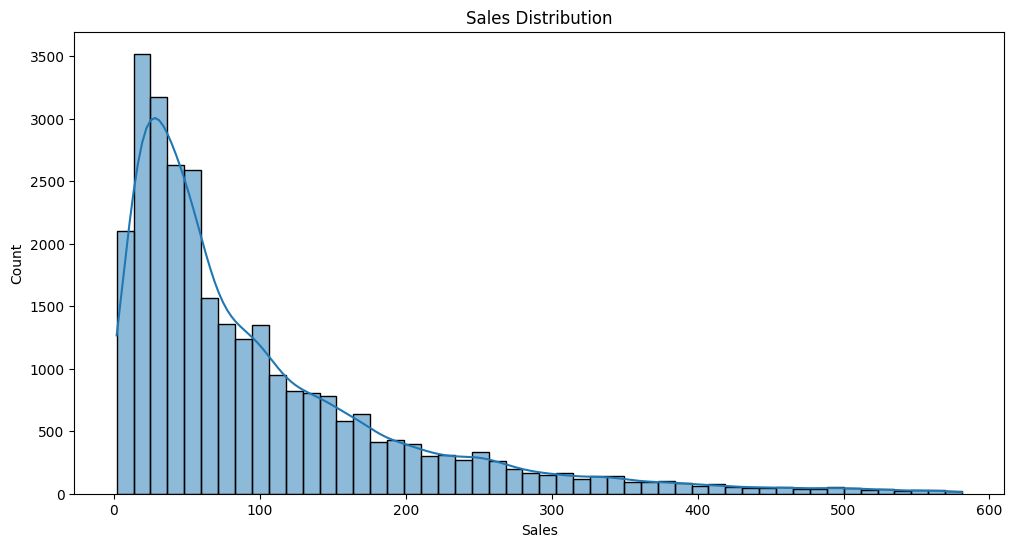

In [13]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.show()

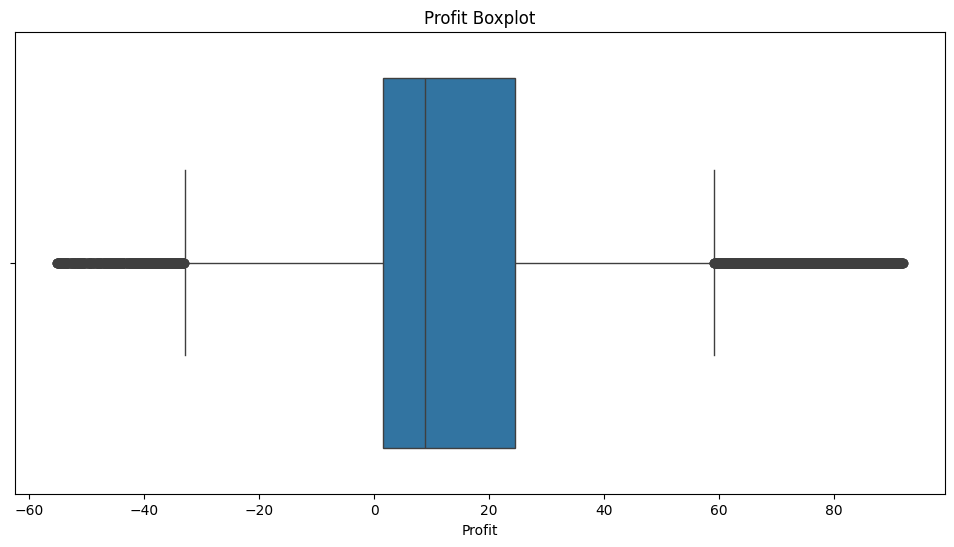

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.show()

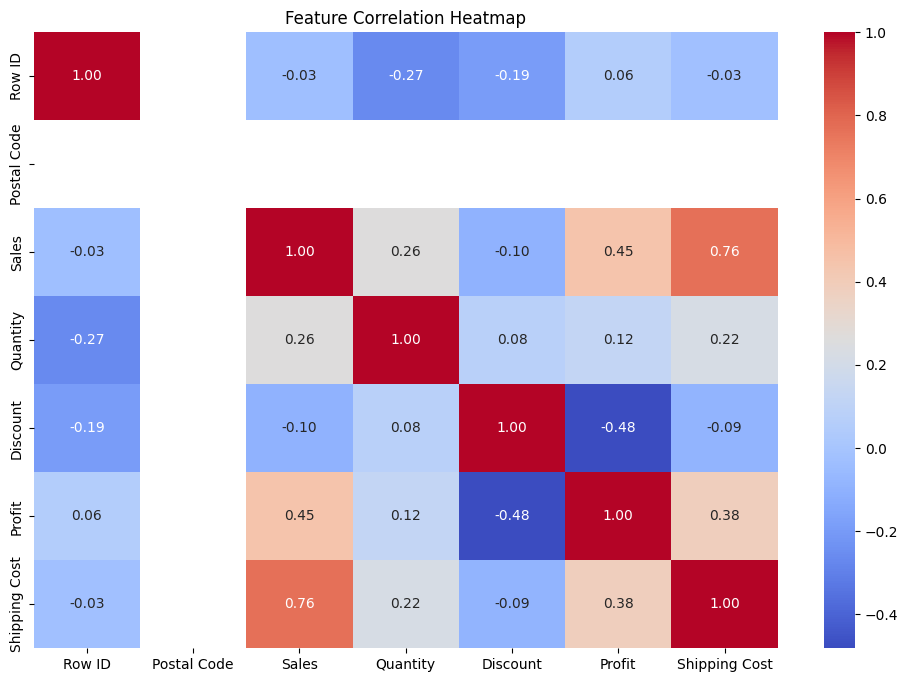

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'


###**IT IS THE CODE FOR THE SALES PERFORMANCE ANALYSIS **


In [17]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
# Load Dataset
df = pd.read_csv("Global_Superstore2.csv",encoding='latin1')

In [19]:
# Display basic info
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)

Dataset Shape: (51290, 24)
Missing Values:
 Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64
Data Types:
 Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region          

In [20]:
# Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
for col in ['Sales', 'Profit', 'Discount']:
    df[col].fillna(df[col].median(), inplace=True) # This line was not indented correctly

# Convert Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-20-eeb0de9ff86d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) # This line was not indented correctly
<ipython-input-20-eeb0de9ff86d>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


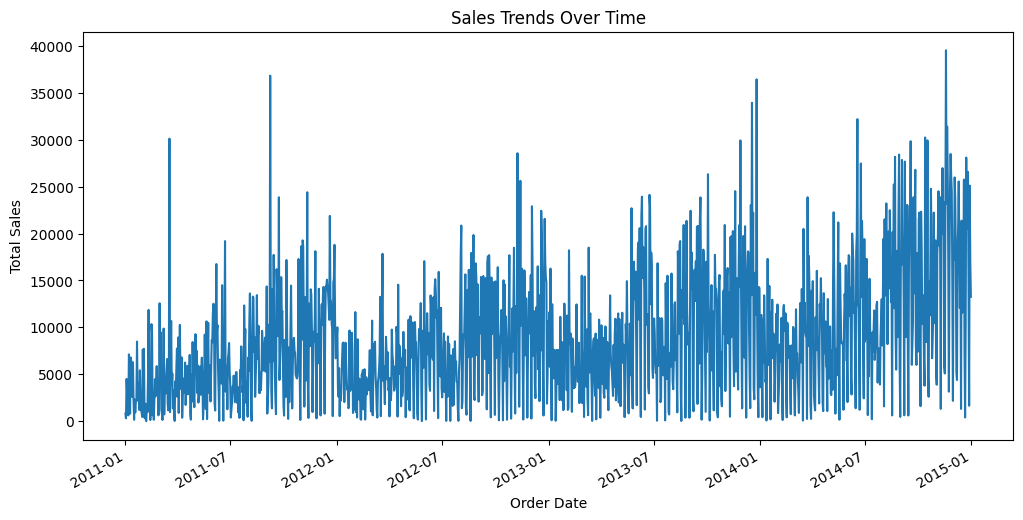

In [23]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title("Sales Trends Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()

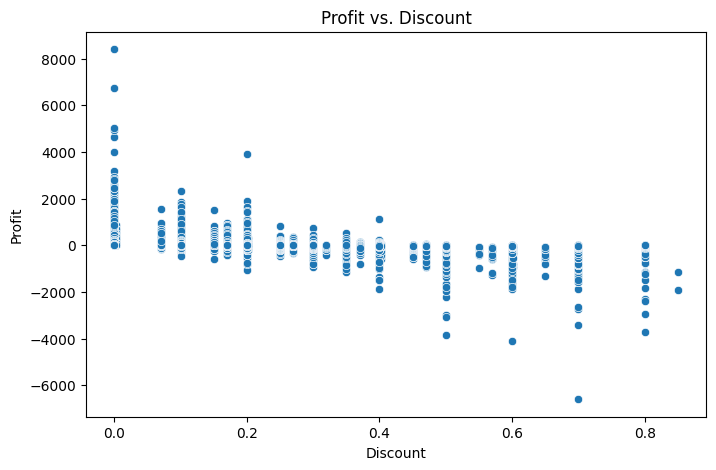

In [24]:
# Scatter plot: Profit vs. Discount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Discount'], y=df['Profit'])
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

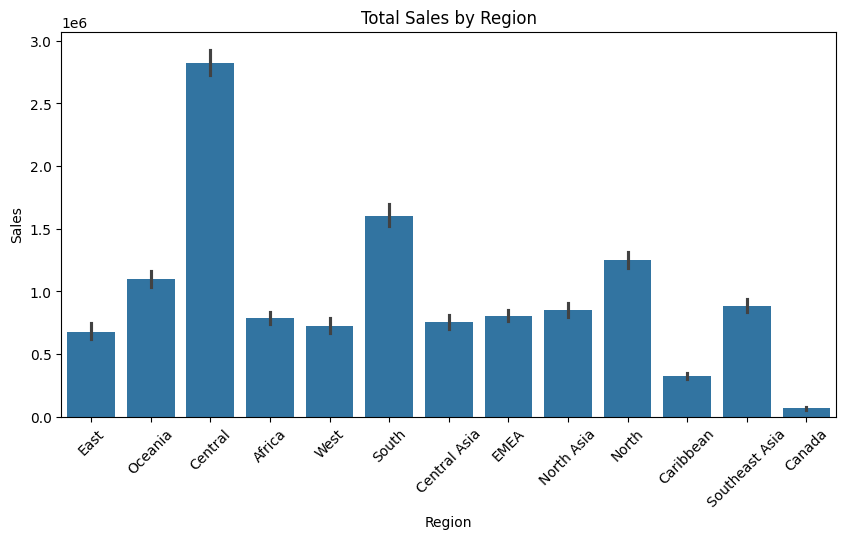

In [25]:
# Sales Distribution by Region and Category
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Sales', data=df, estimator=np.sum)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()

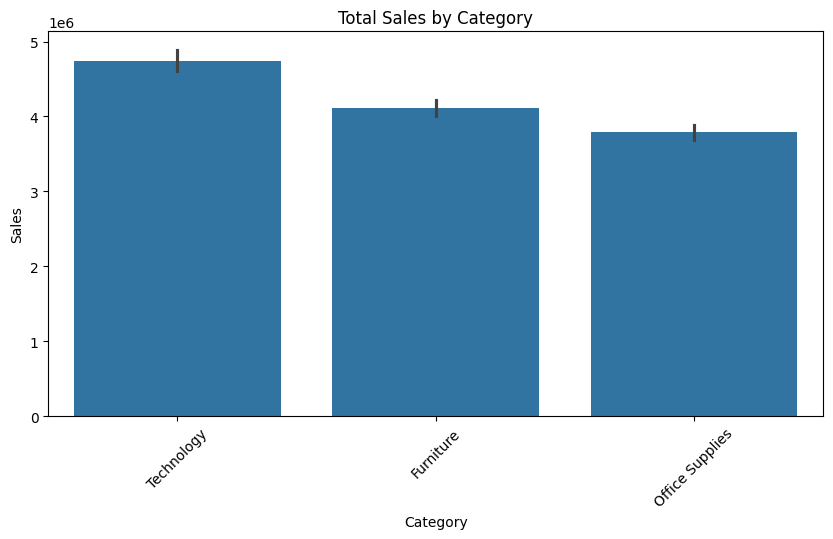

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Sales', data=df, estimator=np.sum)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

In [27]:
# Predictive Modeling
# Select features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error: 187787.80
R-Squared: 0.16


In [30]:
# Insights and Recommendations
if r2 > 0.7:
    print("The model has a strong predictive ability. Consider using this for forecasting.") # Indented this line by 4 spaces
else:
    print("The model could be improved with additional features.") # Indented this line by 4 spaces

print("Insights:")
print("1. Sales trends show seasonal patterns, consider promotional strategies accordingly.")
print("2. High discounts may not always lead to higher profits. Optimize pricing strategies.")
print("3. Focus on high-performing regions and categories to maximize revenue.")

The model could be improved with additional features.
Insights:
1. Sales trends show seasonal patterns, consider promotional strategies accordingly.
2. High discounts may not always lead to higher profits. Optimize pricing strategies.
3. Focus on high-performing regions and categories to maximize revenue.
